## Visualization

In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch import nn, optim
import torch.nn.functional as F

import torchvision
from torchvision import datasets, models, transforms

from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
# load filenames for dog and cat images
train_dog_files = np.array(glob("dogs-vs-cats-redux-kernels-edition/train/dog/*"))
train_cat_files = np.array(glob("dogs-vs-cats-redux-kernels-edition/train/cat/*"))
valid_dog_files = np.array(glob("dogs-vs-cats-redux-kernels-edition/valid/dog/*"))
valid_cat_files = np.array(glob("dogs-vs-cats-redux-kernels-edition/valid/cat/*"))
test_files = np.array(glob("dogs_vs_cats/test/*"))

# print number of images in each dataset
print('There are %d total training dog images.' % len(train_dog_files))
print('There are %d total training cat images.' % len(train_cat_files))
print('There are %d total validation dog images.' % len(valid_dog_files))
print('There are %d total validation cat images.' % len(valid_cat_files))
print('There are %d total test images.' % len(test_files))

There are 10000 total training dog images.
There are 10000 total training cat images.
There are 2500 total validation dog images.
There are 2500 total validation cat images.
There are 12500 total test images.


In [3]:
from torchvision import transforms
transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize([0.485, 0.456, 0.406], 
                                                      [0.229, 0.224, 0.225])])

def process_image(image):
    im = Image.open(image)
    image = transform(im)
    return image.numpy()

def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

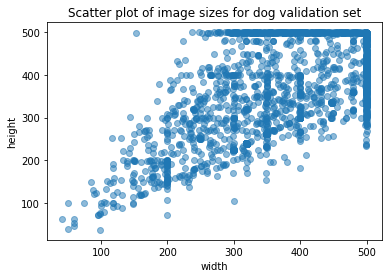

In [4]:
df = pd.DataFrame(columns=['height', 'width'])
cnt = 0
for file in valid_dog_files:
    np_image = process_image(file)
    df.loc[cnt, 'height'] = np_image.shape[1]
    df.loc[cnt, 'width'] = np_image.shape[2]
    cnt += 1
plt.scatter(df.width, df.height, alpha=0.5);
plt.xlabel('width');
plt.ylabel('height');
plt.title('Scatter plot of image sizes for dog validation set');

In [5]:
from torchvision import transforms
# define training and test data directories
data_dir = 'dogs_vs_cats/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

# classes are folders in each directory with these names
classes = ['cat', 'dog']

# how many workers for training
num_workers = 4
# how many samples per batch to load
batch_size = 128

transform = transforms.Compose([transforms.Resize([224, 224]),
                                transforms.ToTensor()])

# choose the training and test datasets
train_data = datasets.ImageFolder(train_dir, transform=transform)
valid_data = datasets.ImageFolder(valid_dir, transform=transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(valid_data))

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers,
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers,
                                           shuffle=False)
loaders = {'train': train_loader, 'valid': valid_loader}

Num training images:  19945
Num validation images:  4976


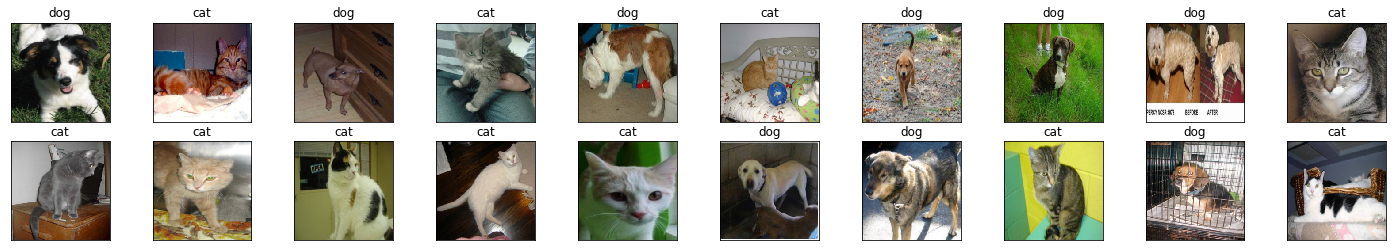

In [6]:
# visualizing 20 training images
images, labels = next(iter(train_loader))
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

In [7]:
results = pd.read_csv('final_submission.csv')
results.head()

,id,label
0,1,0.995
1,2,0.995
2,3,0.995
3,4,0.995
4,5,0.005


In [8]:
len(results[(results['label']<0.9)&(results['label']>0.1)])

91

In [9]:
from torchvision import transforms
transform = transforms.Compose([transforms.Resize([224, 224]),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406], 
                                                      [0.229, 0.224, 0.225])])

def process_image(image):
    im = Image.open(image)
    image = transform(im)
    return image.numpy()

def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

The probability of the image is a dog is 0.995. We predict that it is a dog.


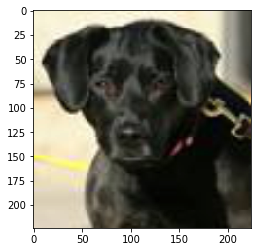

In [10]:
sample = np.random.choice(results.id, size=1)
path = test_dir + str(sample[0]) + '.jpg'
np_image = process_image(path)
image = torch.from_numpy(np_image)
imshow(image)
prob = results.label[sample[0]-1]
if prob > 0.5:
    pred = "dog"
else:
    pred = "cat"
print("The probability of the image is a dog is {}. We predict that it is a {}.".format(prob, pred))

The probability of the image is a dog is 0.005. We predict that it is a cat.


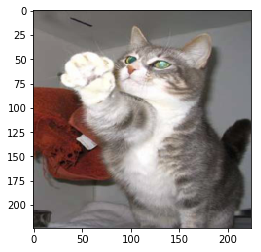

In [11]:
sample2 = np.random.choice(results.id, size=1)
path = test_dir + str(sample2[0]) + '.jpg'
np_image = process_image(path)
image = torch.from_numpy(np_image)
imshow(image)
prob = results.label[sample2[0]-1]
if prob > 0.5:
    pred = "dog"
else:
    pred = "cat"
print("The probability of the image is a dog is {}. We predict that it is a {}.".format(prob, pred))